EJECUTAR CELDA A CELDA LEYENDO LOS COMENTARIOS.

Este notebook contiene una exploración de los datos y un preprocesamiento para dividir los datos en entrenamiento, validación y test.

If on google collab, if not skip the following cell



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#CHANGE ACCORDING TO DIRECTORY
%cd '/content/gdrive/MyDrive/TFG_Matematicas'


Mounted at /content/gdrive
/content/gdrive/MyDrive/TFG_Matematicas


## EDA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import os
import random
from utils.utils import *

## Loading the data

In [ ]:
data_indexes = [(i+1,j+1) for i in range(10) for j in range(2000)]

In [ ]:
identify_nan = False #Set to true to generate a file of discarded indexes containing unstable solutions and move those files to a discarded folder
idx_discard = set()

if identify_nan:
    #Identify data with NaN and big values to discard them
    for idx in data_indexes:
        print(idx)
        if idx not in [(6,1995)]:
            mat = np.loadtxt(f'./datos_tfg/datos_tfg/tfg_datos_{idx[0]}_{idx[1]}.txt')
            if np.isnan(mat[-1]).any() or (mat[-1] > 2).any():
                idx_discard.add(idx)

    #Save de indexes
    with open('utils/idx_nan.txt', 'w') as f:
        for idx in idx_discard:
            f.write(f"{idx[0]}, {idx[1]}\n")


with open('./utils/idx_nan.txt', 'r') as f:
    for line in f:
        idx = line.strip().split(',')
        idx_discard.add((int(idx[0]), int(idx[1].strip())))

if identify_nan:
    for idx in idx_discard:
        old_path = f"./datos_tfg/datos_tfg/tfg_datos_{idx[0]}_{idx[1]}.txt"
        new_path = f"./discarded/tfg_datos_{idx[0]}_{idx[1]}.txt"
        os.rename(old_path, new_path)
        print(f"success with {idx[0]}_{idx[1]}")

In [ ]:
parameters = load_parameter_list()

In [ ]:
df_parameters = pd.DataFrame(parameters, columns=['cx', 'cy', 'a', 'b', 'theta', 'e1', 'e2'])
df_parameters['data_index'] = data_indexes
df_parameters = df_parameters[~df_parameters['data_index'].isin(idx_discard)]
df_parameters.reset_index(inplace = True, drop = True)

## Parameters analysis

The following cells contain a simple statistic analysis of the parameters

In [ ]:
print(f'There are {len(df_parameters)} combination of parameters.')

There are 14094 combination of parameters.


In [ ]:

df_parameters.drop(['data_index'], axis=1).describe().transpose().drop(['25%','75%'], axis=1)

,count,mean,std,min,50%,max
cx,14094.0,0.491080,1.000313,-3.102034,0.483986,4.378377
cy,14094.0,3.516748,0.979522,0.276241,3.495345,7.286987
a,14094.0,1.336852,0.557621,0.015081,1.306456,4.032865
b,14094.0,0.545655,0.385499,0.000054,0.480621,2.429068
theta,14094.0,0.199972,0.318178,-1.009230,0.198383,1.435599
e1,14094.0,2.609604,1.587807,0.000006,2.460476,11.031250
e2,14094.0,4.069547,2.244209,0.000887,4.056431,13.713040


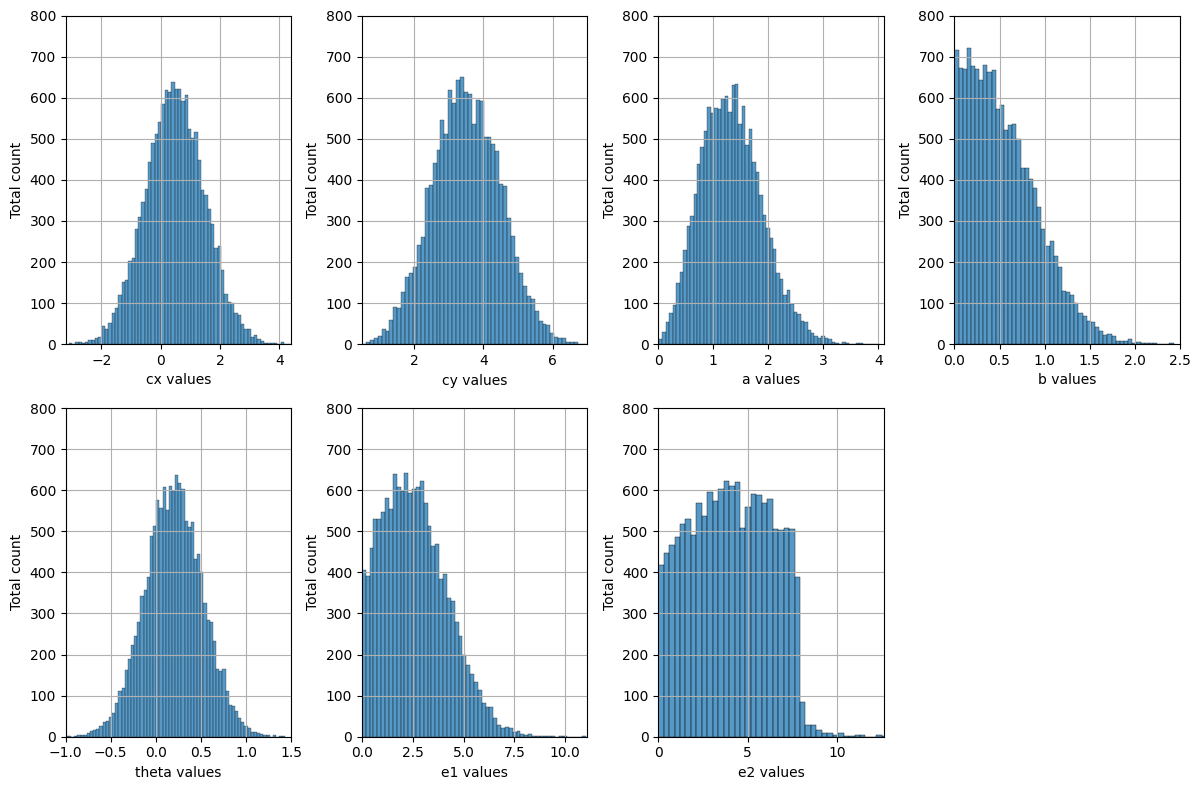

In [ ]:
visualize_parameter_distributions(df_parameters, 800, file = f"./figures/parameter_distribution.jpg")

## Visualizing training data

The following cells contain a code fragment to visualize random data samples

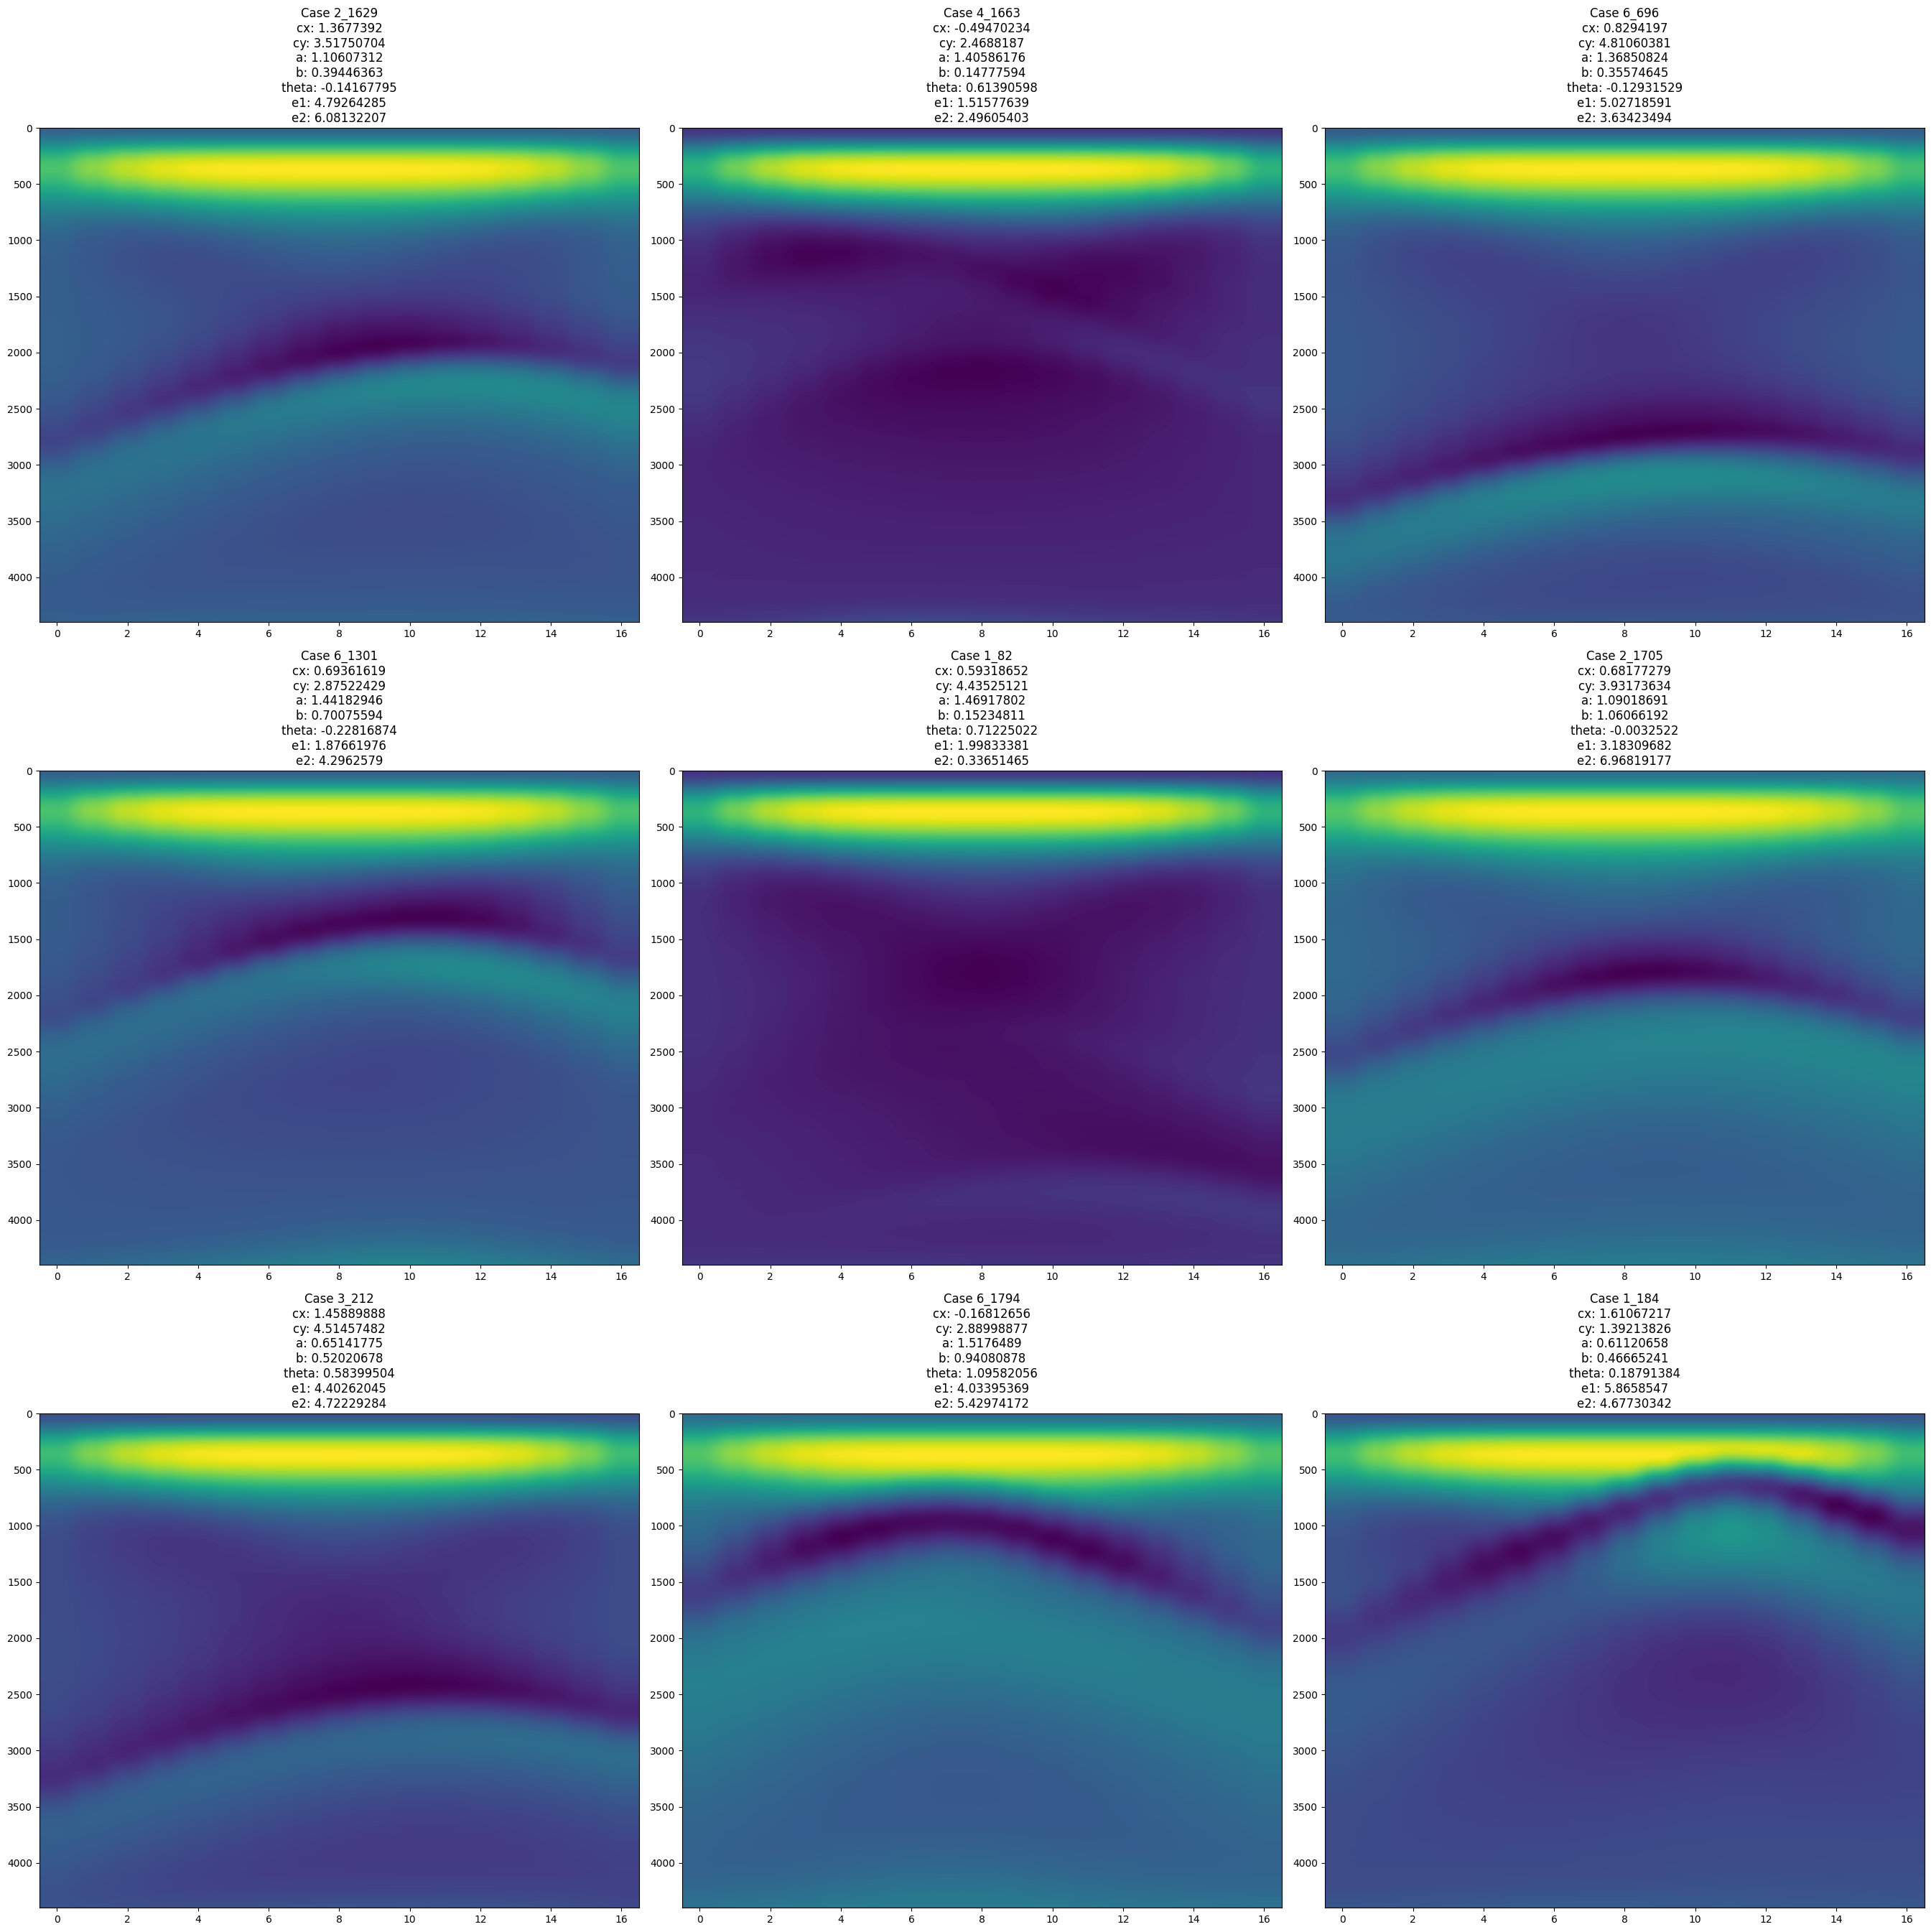

In [ ]:
n = 9
idx_viz = []
for i in range(n):
    idx_1 = random.randint(1,10)
    idx_2 = random.randint(1,2000)
    while (idx_1, idx_2) in idx_discard:
        idx_1 = random.randint(1,5)
        idx_2 = random.randint(1,2000)
    idx_viz.append((idx_1,idx_2))

visualize(idx_viz, df_parameters, cols = 3, file = f"./figures/sample_9.png")

## Preprocessing

The following cells prepare the train, validation and test splits, and visualize their distributions

In [ ]:
pip install iterative-stratification


In [ ]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

In [ ]:
X = pd.DataFrame(df_parameters['data_index']) #Matrixes
y = df_parameters.drop(['data_index'], axis=1) #Parameters

In [ ]:
# We first divide the dataset in 10 splits
mskf = MultilabelStratifiedKFold(n_splits=10, shuffle = True, random_state=0)
X.loc[:, 'fold'] = -1
y.loc[:, 'fold'] = -1

In [ ]:
for fold_ , (train_, valid_) in enumerate(mskf.split(X=X, y=y)):
    X.loc[valid_, 'fold'] = fold_
    y.loc[valid_, 'fold'] = fold_

------------- FOLD 0 -------------
        count      mean       std       min       50%        max
cx     1410.0  0.519407  1.015210 -2.383869  0.522860   3.982865
cy     1410.0  3.514614  1.003034  0.665031  3.505625   6.255788
a      1410.0  1.344806  0.551477  0.032099  1.321471   3.545512
b      1410.0  0.545856  0.382954  0.000700  0.486111   2.219840
theta  1410.0  0.192896  0.320466 -0.824384  0.188419   1.312256
e1     1410.0  2.603137  1.612615  0.006716  2.456558   8.475540
e2     1410.0  3.948331  2.233882  0.005730  3.967469  13.292454
fold   1410.0  0.000000  0.000000  0.000000  0.000000   0.000000


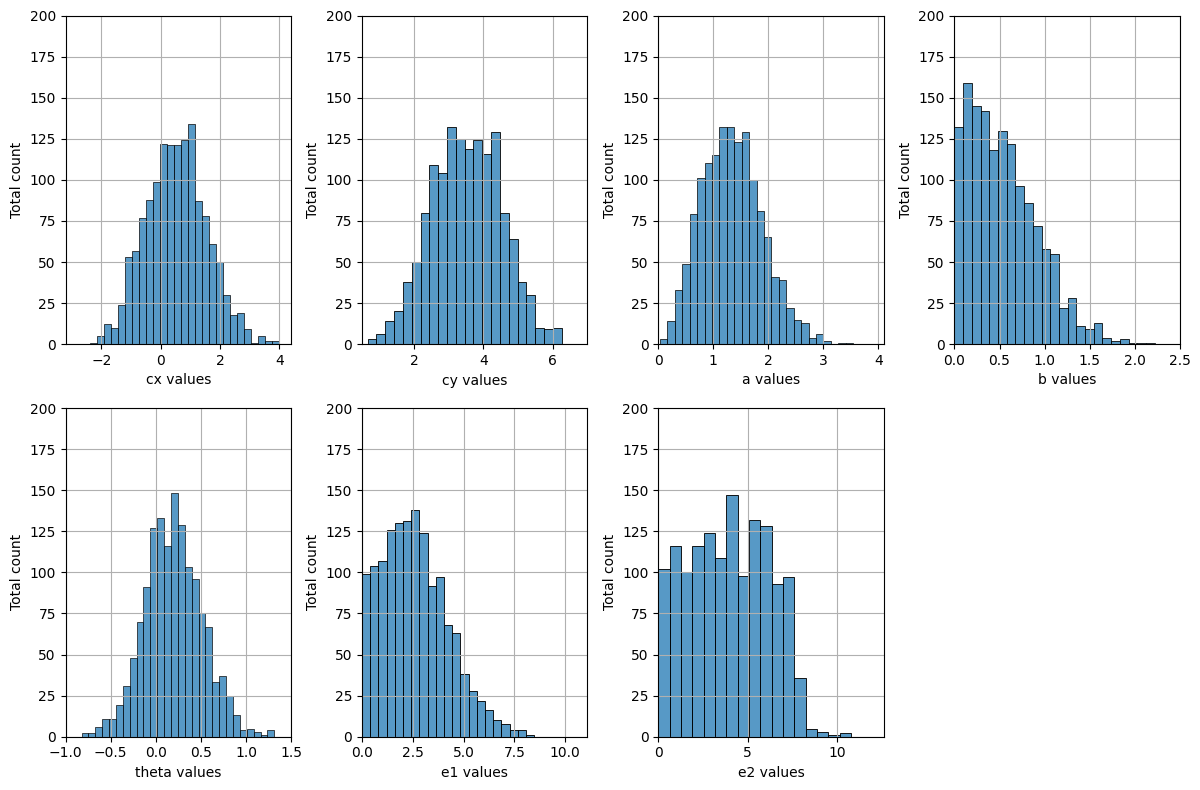

------------- FOLD 1 -------------
        count      mean       std       min       50%        max
cx     1410.0  0.486599  0.994727 -2.693094  0.489125   4.138670
cy     1410.0  3.538271  1.029741  0.426711  3.507651   6.712479
a      1410.0  1.354848  0.558546  0.032033  1.309511   3.237697
b      1410.0  0.541814  0.385313  0.000376  0.485905   2.034748
theta  1410.0  0.200631  0.322053 -0.977577  0.194219   1.191777
e1     1410.0  2.690304  1.666220  0.000006  2.530454   9.703464
e2     1410.0  4.013902  2.236557  0.001964  3.980239  13.713040
fold   1410.0  1.000000  0.000000  1.000000  1.000000   1.000000


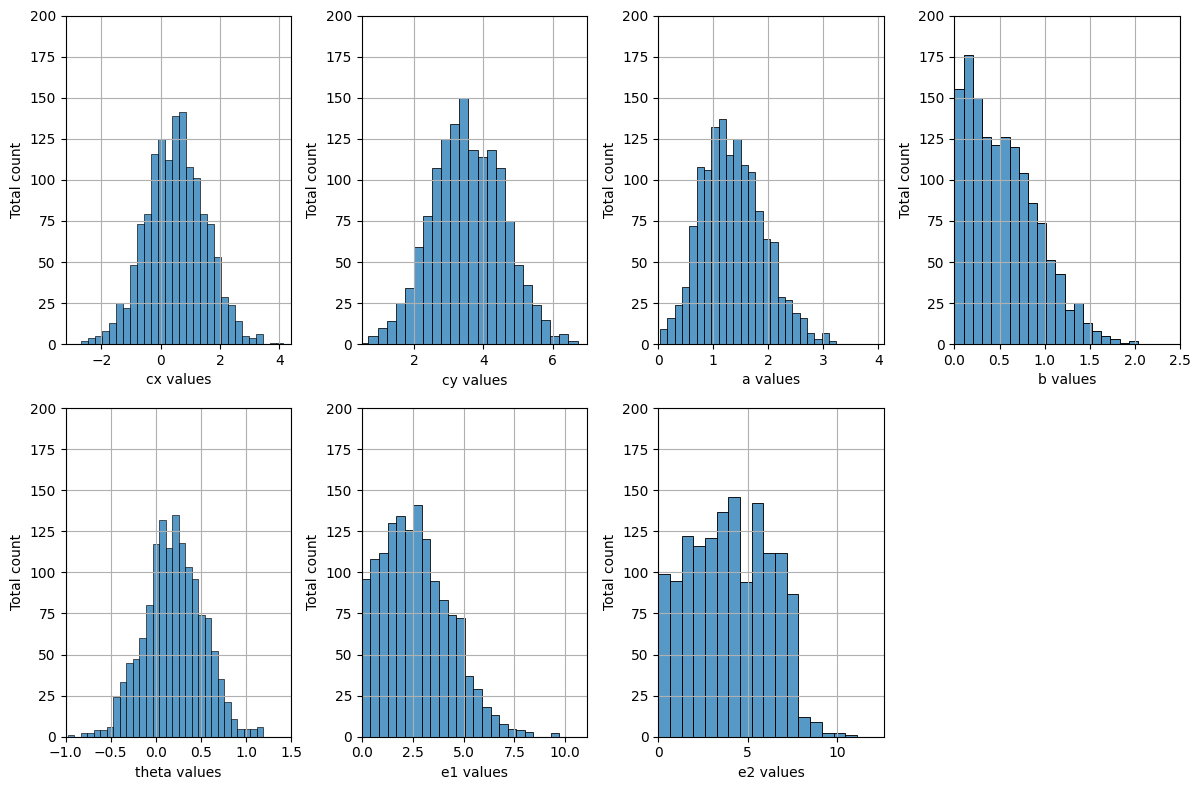

------------- FOLD 2 -------------
        count      mean       std       min       50%        max
cx     1409.0  0.422432  1.030686 -2.830086  0.397078   4.133649
cy     1409.0  3.501557  0.972686  0.634642  3.510207   6.708300
a      1409.0  1.327519  0.553263  0.119558  1.289210   3.702683
b      1409.0  0.538421  0.387993  0.001448  0.468635   1.946950
theta  1409.0  0.203585  0.318734 -0.838067  0.205922   1.181731
e1     1409.0  2.512445  1.557183  0.000064  2.308127   7.786976
e2     1409.0  4.045557  2.258869  0.007117  4.021021  12.431744
fold   1409.0  2.000000  0.000000  2.000000  2.000000   2.000000


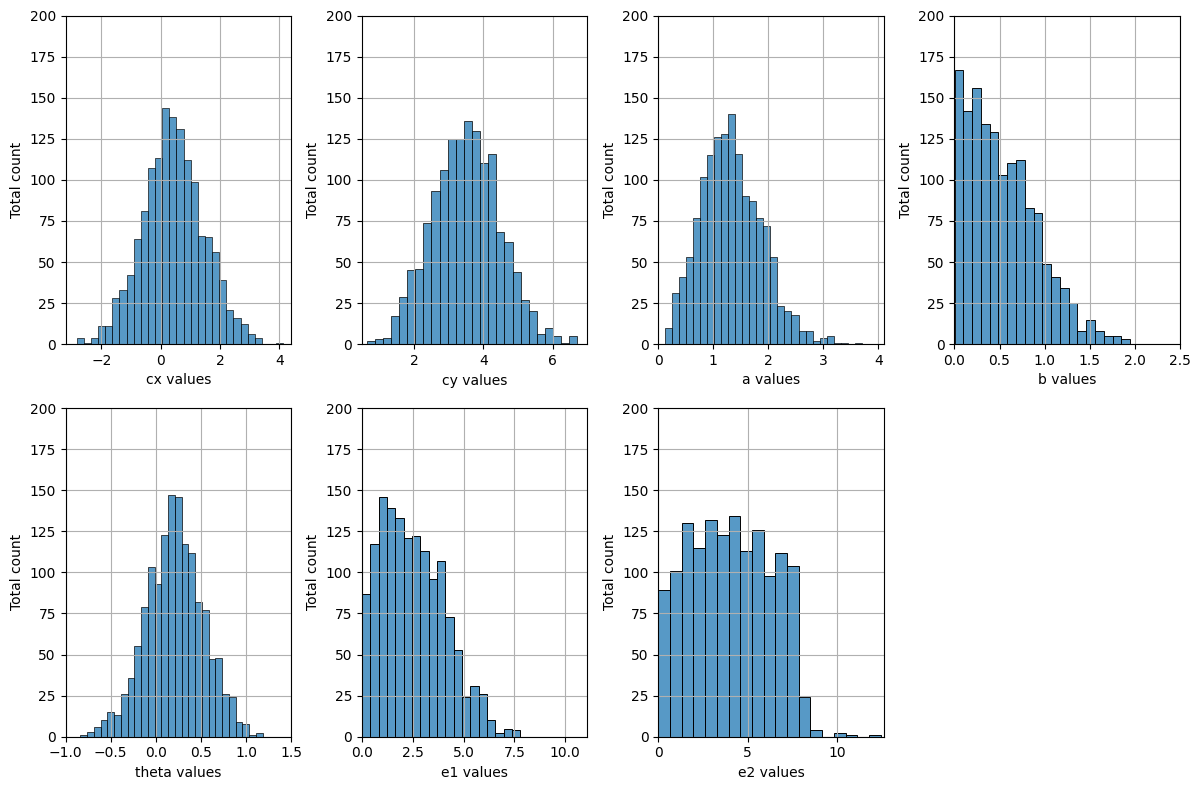

------------- FOLD 3 -------------
        count      mean       std       min       50%        max
cx     1409.0  0.517437  1.012339 -2.860436  0.514974   4.113686
cy     1409.0  3.509310  0.960743  0.650975  3.506861   6.764944
a      1409.0  1.338957  0.564918  0.015081  1.302939   3.462639
b      1409.0  0.552821  0.388241  0.000287  0.489999   2.177653
theta  1409.0  0.215764  0.320772 -0.786606  0.223828   1.373240
e1     1409.0  2.593264  1.615471  0.003180  2.413379   9.410524
e2     1409.0  4.021232  2.216507  0.015758  4.031395  10.110476
fold   1409.0  3.000000  0.000000  3.000000  3.000000   3.000000


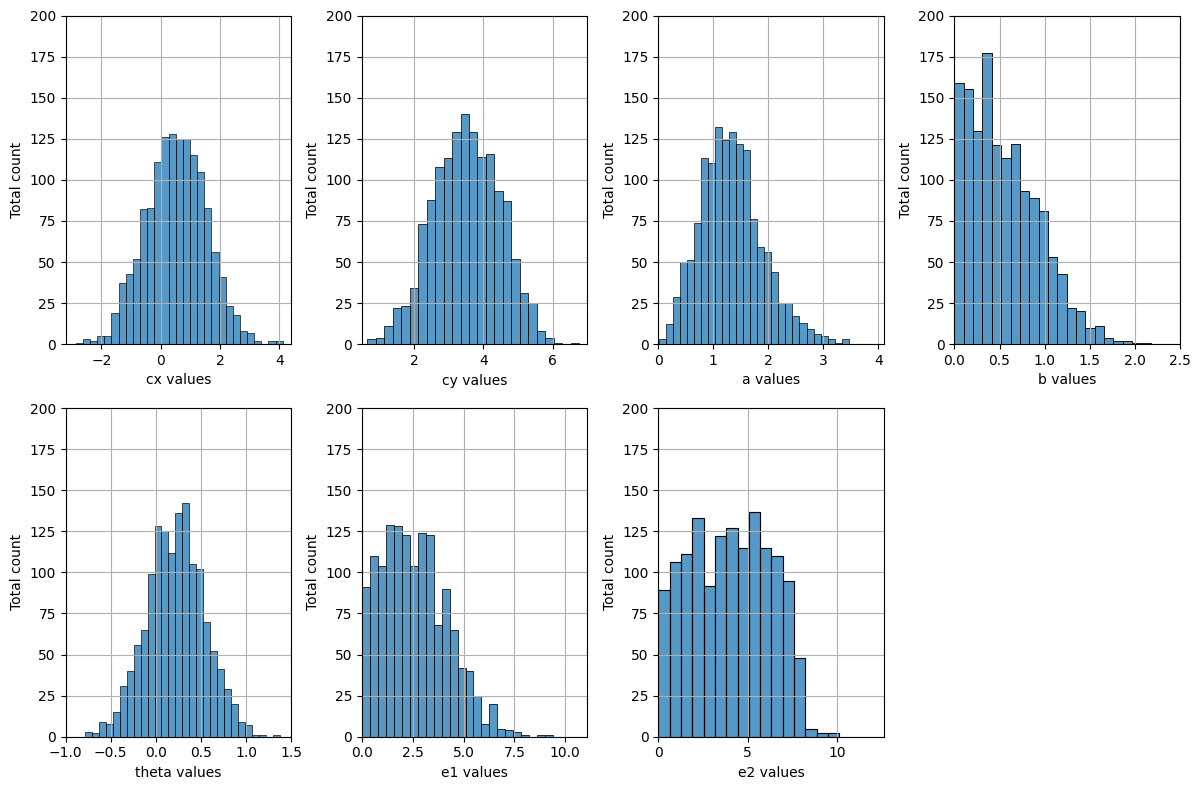

------------- FOLD 4 -------------
        count      mean       std       min       50%        max
cx     1409.0  0.493553  0.962315 -2.835535  0.481807   3.639673
cy     1409.0  3.506570  0.977999  1.022732  3.488301   6.681080
a      1409.0  1.302116  0.552011  0.032472  1.288818   3.164958
b      1409.0  0.533513  0.375602  0.001521  0.474406   2.140451
theta  1409.0  0.193512  0.312638 -0.835219  0.194465   1.248117
e1     1409.0  2.603965  1.610711  0.009311  2.479010   9.153356
e2     1409.0  4.096715  2.239721  0.001778  4.147559  11.566109
fold   1409.0  4.000000  0.000000  4.000000  4.000000   4.000000


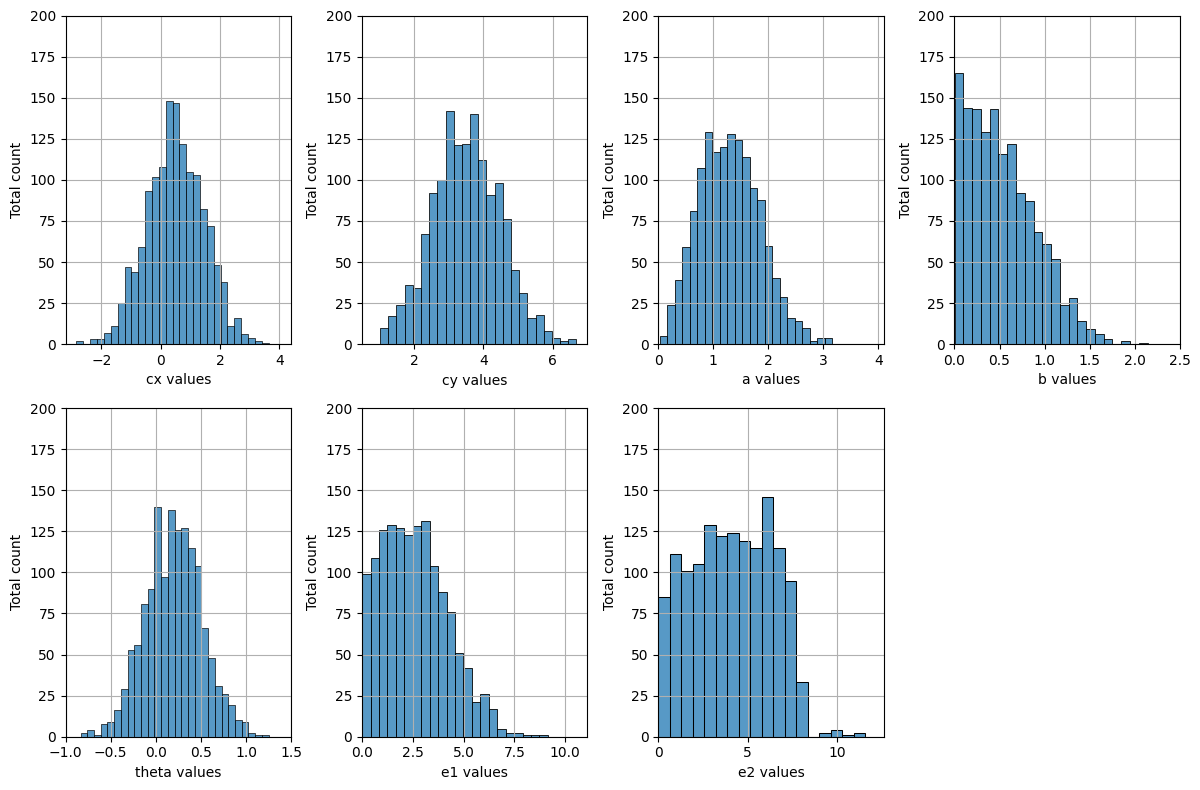

------------- FOLD 5 -------------
        count      mean       std       min       50%        max
cx     1409.0  0.494402  0.988174 -3.102034  0.490933   4.130790
cy     1409.0  3.487915  0.936615  0.572812  3.458792   6.408008
a      1409.0  1.330711  0.562301  0.041495  1.306175   3.654309
b      1409.0  0.539603  0.382523  0.000054  0.467245   1.960044
theta  1409.0  0.178726  0.315705 -1.009230  0.180547   1.228629
e1     1409.0  2.621945  1.594094  0.004380  2.457523  11.031250
e2     1409.0  4.091336  2.260576  0.000887  4.054655  11.511838
fold   1409.0  5.000000  0.000000  5.000000  5.000000   5.000000


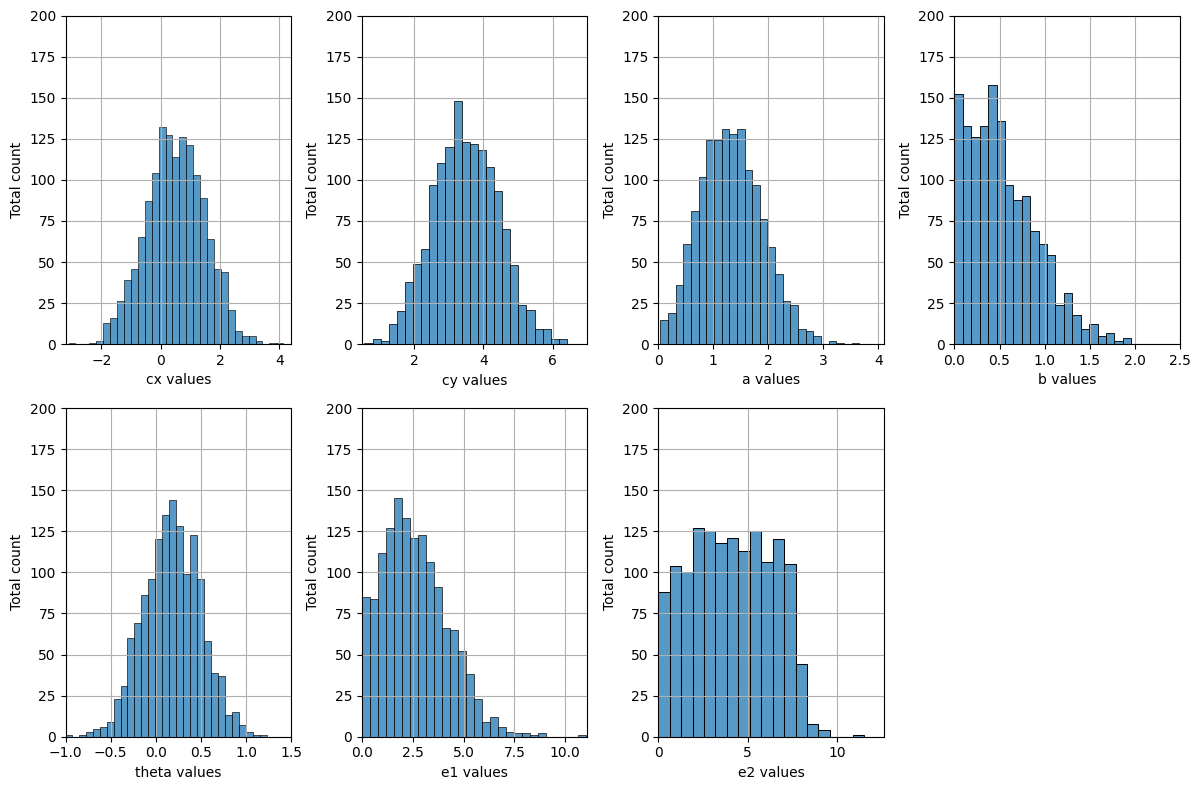

------------- FOLD 6 -------------
        count      mean       std       min       50%        max
cx     1409.0  0.476957  0.979897 -3.023943  0.449314   3.383274
cy     1409.0  3.538099  0.984664  0.886080  3.493517   6.687872
a      1409.0  1.318366  0.558776  0.091113  1.287322   3.851698
b      1409.0  0.541518  0.388918  0.001411  0.475747   2.204865
theta  1409.0  0.213877  0.323225 -0.756269  0.210603   1.319627
e1     1409.0  2.659523  1.543388  0.004207  2.530527  10.031247
e2     1409.0  4.026602  2.267543  0.002375  4.014427  12.483980
fold   1409.0  6.000000  0.000000  6.000000  6.000000   6.000000


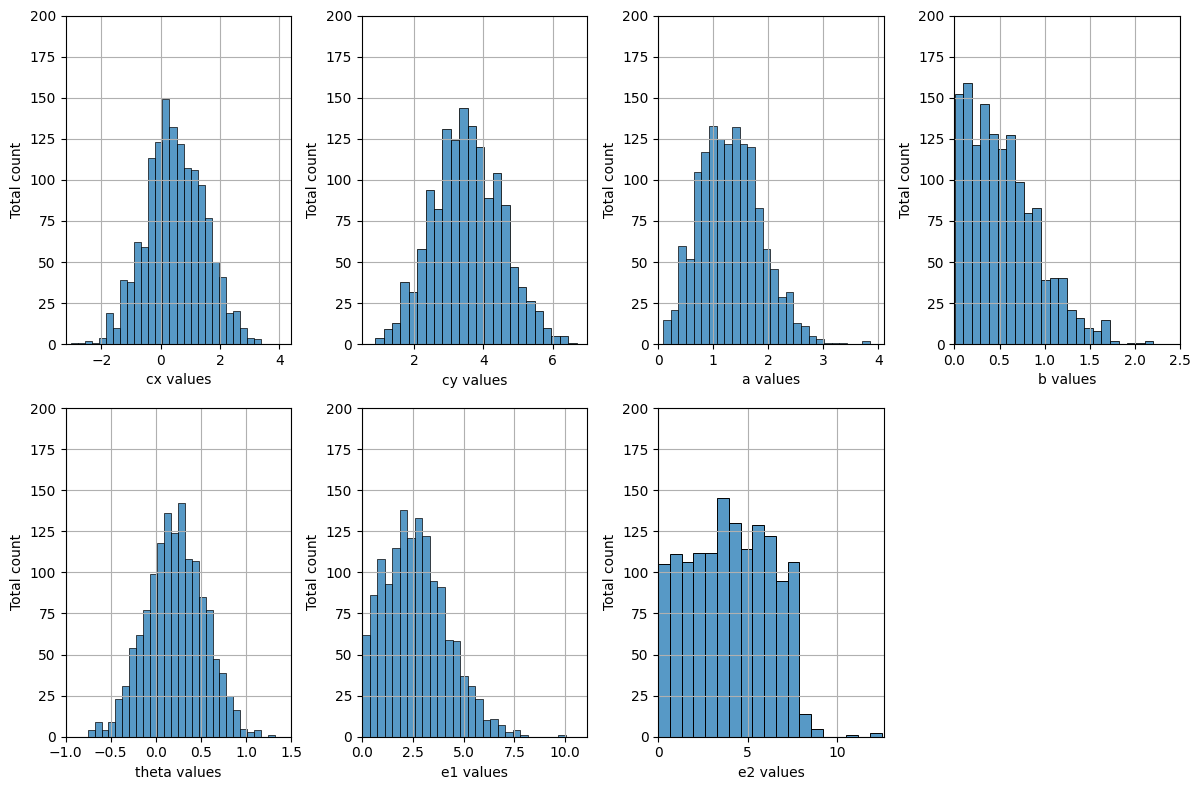

------------- FOLD 7 -------------
        count      mean       std       min       50%        max
cx     1410.0  0.466052  1.012644 -2.827629  0.506264   3.411020
cy     1410.0  3.551049  0.953186  0.276241  3.516009   6.450685
a      1410.0  1.346777  0.567343  0.084304  1.315704   3.672774
b      1410.0  0.556182  0.388198  0.002235  0.478480   2.429068
theta  1410.0  0.195487  0.319949 -0.947475  0.195989   1.435599
e1     1410.0  2.540555  1.565509  0.005511  2.336297   8.164433
e2     1410.0  4.206721  2.242600  0.008646  4.248983  12.517647
fold   1410.0  7.000000  0.000000  7.000000  7.000000   7.000000


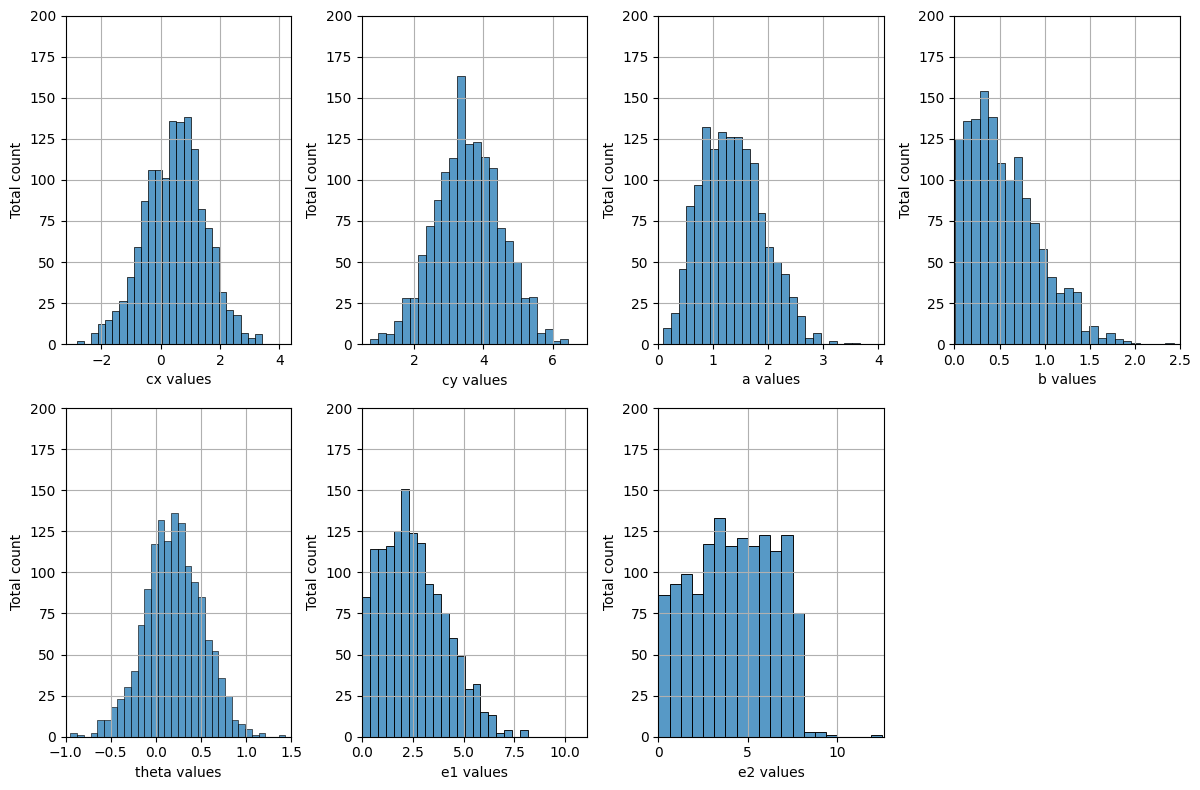

------------- FOLD 8 -------------
        count      mean       std       min       50%        max
cx     1409.0  0.504513  0.991281 -2.679762  0.508268   4.378377
cy     1409.0  3.523404  0.992336  0.829259  3.517159   7.286987
a      1409.0  1.359689  0.563590  0.060661  1.343110   4.032865
b      1409.0  0.559028  0.384028  0.000130  0.490247   2.125607
theta  1409.0  0.198709  0.316695 -0.806855  0.188698   1.229266
e1     1409.0  2.684661  1.564740  0.004928  2.603081   8.355786
e2     1409.0  4.163707  2.240679  0.003877  4.102142  11.214868
fold   1409.0  8.000000  0.000000  8.000000  8.000000   8.000000


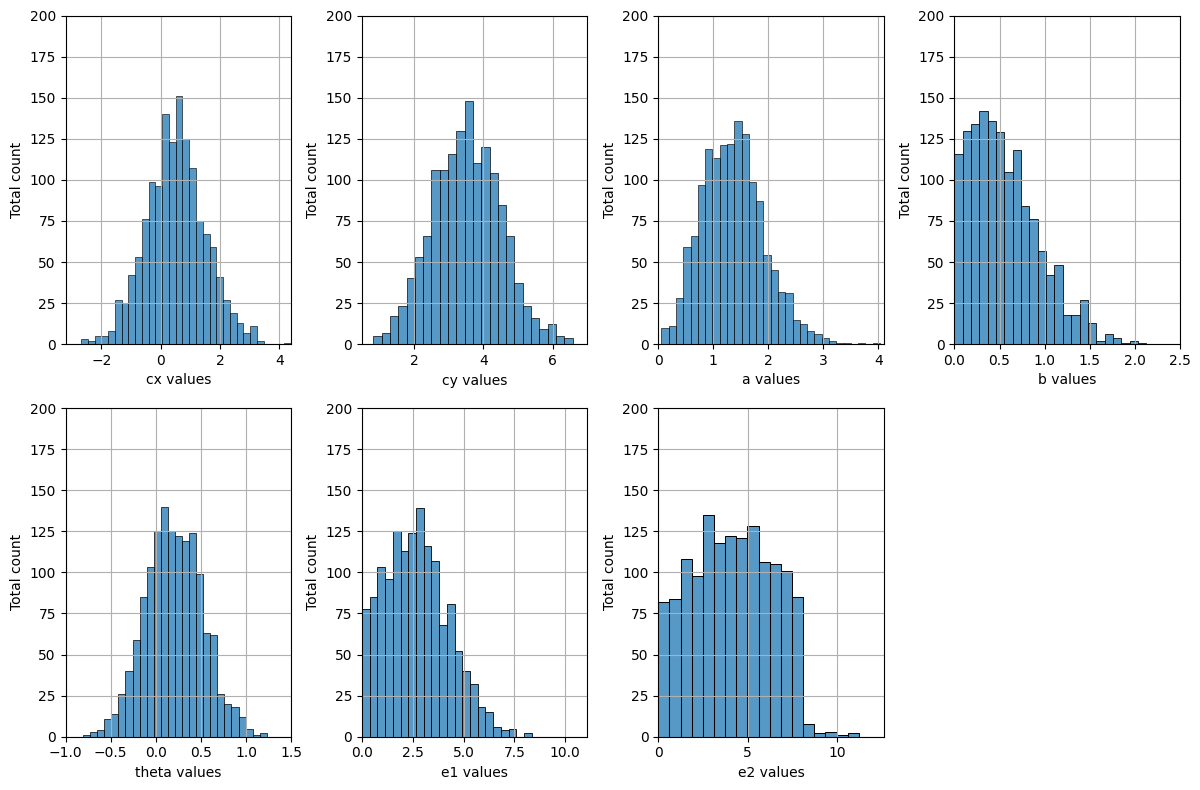

------------- FOLD 9 -------------
        count      mean       std       min       50%        max
cx     1410.0  0.529421  1.012807 -2.567911  0.489885   3.480084
cy     1410.0  3.496667  0.982212  0.752617  3.442016   6.305499
a      1410.0  1.344696  0.542851  0.041099  1.307386   3.121918
b      1410.0  0.547793  0.391416  0.001396  0.481709   2.397364
theta  1410.0  0.206539  0.310650 -0.886144  0.206025   1.199161
e1     1410.0  2.586253  1.539238  0.001776  2.478750   9.010049
e2     1410.0  4.081388  2.240395  0.001369  4.044468  10.236425
fold   1410.0  9.000000  0.000000  9.000000  9.000000   9.000000


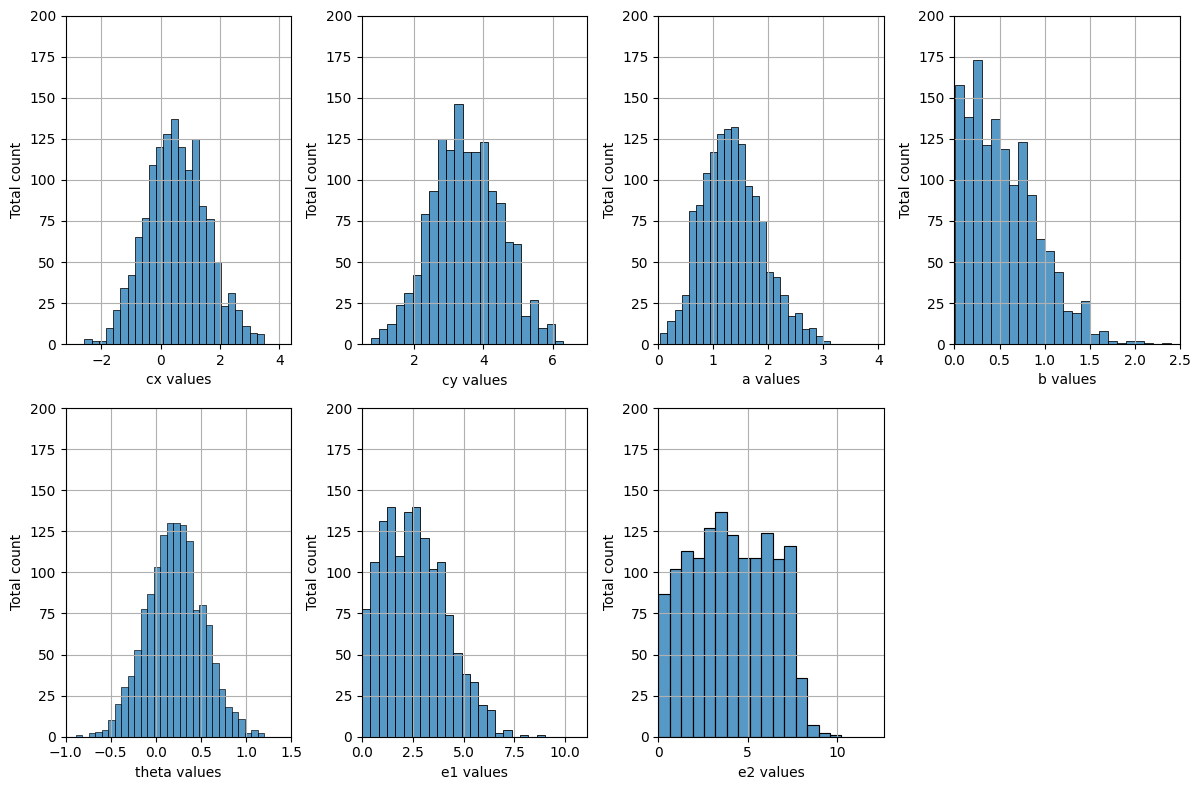

In [ ]:
# Visualize each of the 10 splits

show_distribution = True #Set to true to plot distributions

for i in range(10):
  print(f'------------- FOLD {i} -------------')
  params = y[y['fold'] == i]
  print(params.describe().drop(['25%','75%']).transpose())
  if show_distribution:
    visualize_parameter_distributions(params, 200, file = f"./figures/fold_{i}_distribution.png")

In [ ]:
# Assign 8 splits to train (80%), 1 split to validation (10%) and 1 split to test (10%)
X_train = X[(X['fold'] == 0) | (X['fold'] == 1) | (X['fold'] == 2) | (X['fold'] == 3) | (X['fold'] == 4) | (X['fold'] == 5) | (X['fold'] == 6) | (X['fold'] == 7)]
y_train = y[(y['fold'] == 0) | (y['fold'] == 1) | (y['fold'] == 2) | (y['fold'] == 3) | (y['fold'] == 4) | (y['fold'] == 5) | (y['fold'] == 6) | (y['fold'] == 7)]

X_validation = X[X['fold'] == 8]
y_validation = y[y['fold'] == 8]

X_test = X[X['fold'] == 9]
y_test = y[y['fold'] == 9]

In [ ]:
y_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cx,11275.0,0.484607,0.999829,-3.102034,-0.189971,0.481406,1.164895,4.138670
cy,11275.0,3.518427,0.977629,0.276241,2.838573,3.498058,4.204672,6.764944
a,11275.0,1.333017,0.558663,0.015081,0.922435,1.301240,1.696558,3.851698
b,11275.0,0.543717,0.384937,0.000054,0.232018,0.478376,0.790707,2.429068
theta,11275.0,0.199309,0.319310,-1.009230,-0.011632,0.198567,0.415356,1.435599
e1,11275.0,2.603144,1.596505,0.000006,1.347364,2.436118,3.653928,11.031250
e2,11275.0,4.056300,2.245035,0.000887,2.202511,4.054655,5.891062,13.713040
fold,11275.0,3.499778,2.291680,0.000000,1.000000,3.000000,5.500000,7.000000


In [ ]:
y_validation.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cx,1409.0,0.504513,0.991281,-2.679762,-0.161154,0.508268,1.140554,4.378377
cy,1409.0,3.523404,0.992336,0.829259,2.823017,3.517159,4.199594,7.286987
a,1409.0,1.359689,0.563590,0.060661,0.942569,1.343110,1.700286,4.032865
b,1409.0,0.559028,0.384028,0.000130,0.257523,0.490247,0.788397,2.125607
theta,1409.0,0.198709,0.316695,-0.806855,-0.019683,0.188698,0.419933,1.229266
e1,1409.0,2.684661,1.564740,0.004928,1.468798,2.603081,3.685331,8.355786
e2,1409.0,4.163707,2.240679,0.003877,2.390501,4.102142,5.979829,11.214868
fold,1409.0,8.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [ ]:
y_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cx,1410.0,0.529421,1.012807,-2.567911,-0.177007,0.489885,1.219021,3.480084
cy,1410.0,3.496667,0.982212,0.752617,2.794971,3.442016,4.182938,6.305499
a,1410.0,1.344696,0.542851,0.041099,0.953826,1.307386,1.698686,3.121918
b,1410.0,0.547793,0.391416,0.001396,0.229789,0.481709,0.791165,2.397364
theta,1410.0,0.206539,0.310650,-0.886144,-0.001568,0.206025,0.404559,1.199161
e1,1410.0,2.586253,1.539238,0.001776,1.336927,2.478750,3.632925,9.010049
e2,1410.0,4.081388,2.240395,0.001369,2.229903,4.044468,5.994207,10.236425
fold,1410.0,9.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [ ]:
save_indexes(X_train['data_index'], './mock/utils/train.txt')
save_indexes(X_validation['data_index'], './mock/utils/validation.txt')
save_indexes(X_test['data_index'], './mock/utils/test.txt')